# Capstone Project 3

## Early Diabetes Detection

Data Source:  UCI Center for Machine Learning http://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.#


In [1]:
# packages
import csv
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from datetime                import datetime
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Capstone3 Early Diabetes Detection.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   Sudden Weight Loss  520 non-null    object
 5   Weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital Thrush      520 non-null    object
 8   Visual Blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  Delayed Healing     520 non-null    object
 12  Partial Paresis     520 non-null    object
 13  Muscle Stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  Class               520 no

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Covert literals to integers

# Convert Yes/No            to 1/0
#         Female/Male       to 1/0
#         Positive/Negative to 1/0
df1 = df.replace(['Yes', 'No', 'Female', 'Male', 'Positive', 'Negative'], 
                [    1 ,   0 ,       1 ,     0 ,         1 ,         0 ])
df1.head()

,Age,Gender,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


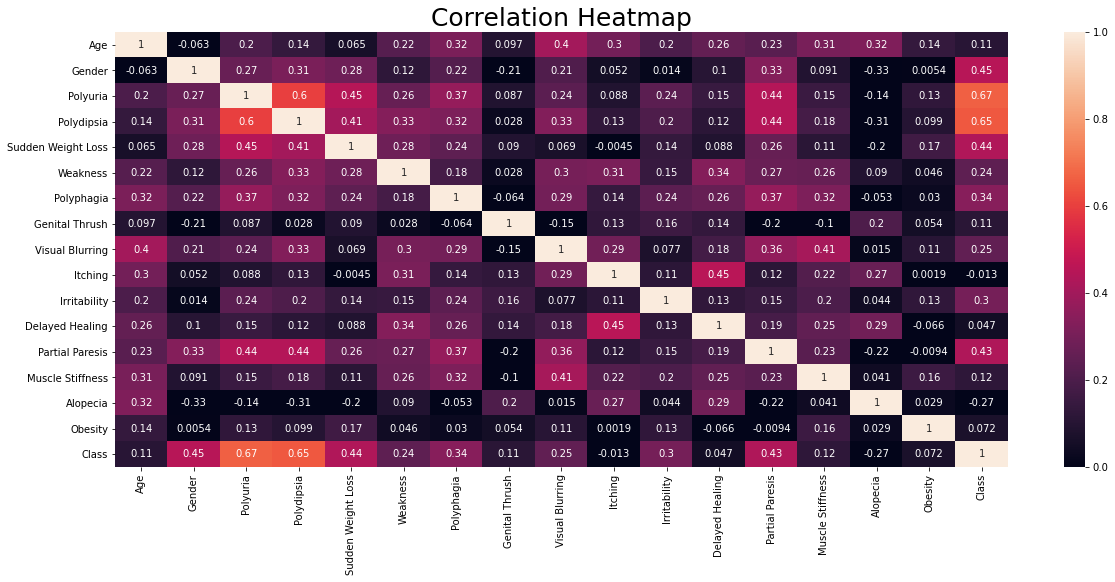

In [5]:
# Create correlation heatmap

feature_cols = df1[['Age',
                    'Gender',
                    'Polyuria',
                    'Polydipsia',
                    'Sudden Weight Loss',
                    'Weakness',
                    'Polyphagia', 
                    'Genital Thrush', 
                    'Visual Blurring', 
                    'Itching', 
                    'Irritability', 
                    'Delayed Healing', 
                    'Partial Paresis',
                    'Muscle Stiffness', 
                    'Alopecia', 
                    'Obesity', 
                    'Class']]

plt.subplots(figsize=(20,8))
sns.heatmap(feature_cols.corr(), annot=True, vmin=0, vmax=1)
plt.title('Correlation Heatmap', fontsize=25)
plt.savefig('figures/correlation_heatmap')
plt.show()

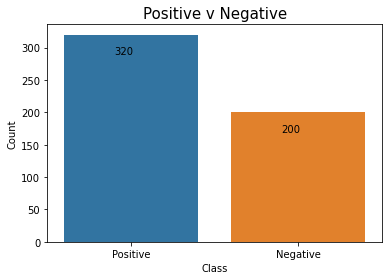

In [6]:
# Display Positive and Negative counts

ax = sns.countplot(df['Class'],label='Count')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), va='top')
plt.title('Positive v Negative', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_positive_negative')
plt.show()

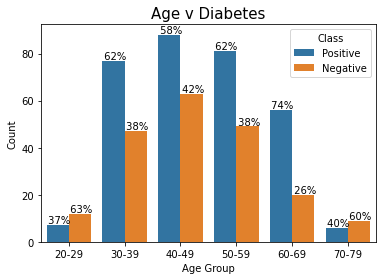

In [7]:
def age(i):
    for x in range(10,100,10):
        if i < x:
            la = f'{x-10}-{x-1}'
            return la
            break
df['Age Group'] = df['Age'].apply(lambda x:age(x))

ax = sns.countplot(x='Age Group', data=df, hue='Class', order=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        l_per = height_l/total
        r_per = height_r/total
        if l_per == np.nan:
            l_per = 100
        if r_per == np.nan:
            r_per = 100
        ax.text(left.get_x()  + left.get_width()/2,  height_l+2, ' {0:.0%}'.format(l_per), va='center', ha='center')
        ax.text(right.get_x() + right.get_width()/2, height_r+2, ' {0:.0%}'.format(r_per), va='center', ha='center')
plt.title('Age v Diabetes',fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_age')
plt.show()

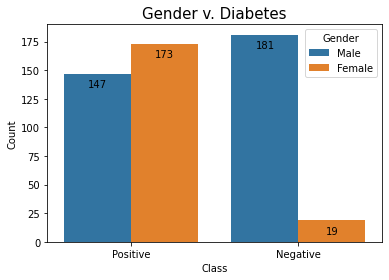

In [8]:
ax = sns.countplot(x='Class', hue='Gender', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()-5), ha='center', va='top')
plt.title('Gender v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_gender')
plt.show()

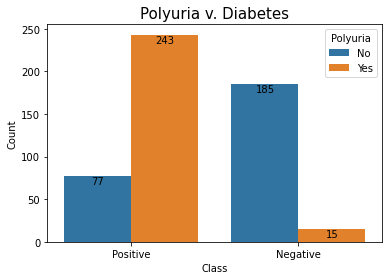

In [9]:
ax = sns.countplot(x='Class', hue='Polyuria', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+.2, p.get_height()), ha='center', va='top')
plt.title('Polyuria v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_polyuria')
plt.show()

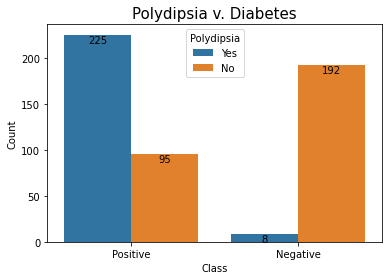

In [10]:
ax = sns.countplot(x='Class', hue='Polydipsia', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Polydipsia v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_polydipsia')
plt.show()

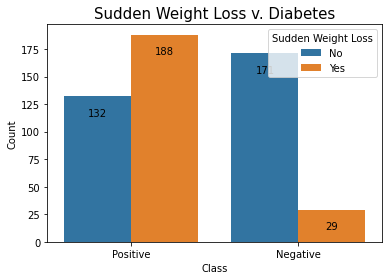

In [11]:
ax = sns.countplot(x='Class', hue='Sudden Weight Loss', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Sudden Weight Loss v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_sudden_weight_loss')
plt.show()

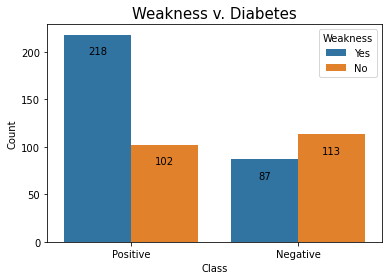

In [12]:
ax = sns.countplot(x='Class', hue='Weakness', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Weakness v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_weakness')
plt.show()

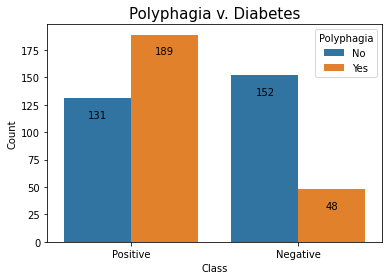

In [13]:
ax = sns.countplot(x='Class', hue='Polyphagia', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Polyphagia v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_polyphagia')
plt.show()

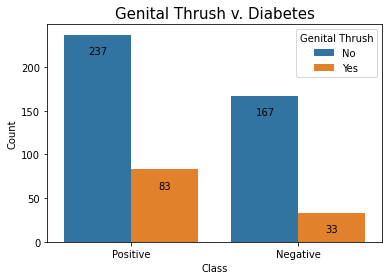

In [14]:
ax = sns.countplot(x='Class', hue='Genital Thrush', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Genital Thrush v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_genital_thrush')
plt.show()

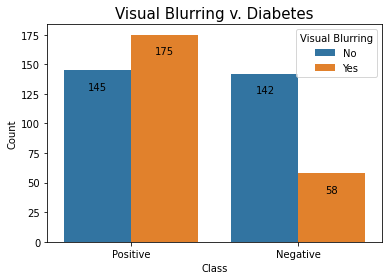

In [15]:
ax = sns.countplot(x='Class', hue='Visual Blurring', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Visual Blurring v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_blurring')
plt.show()

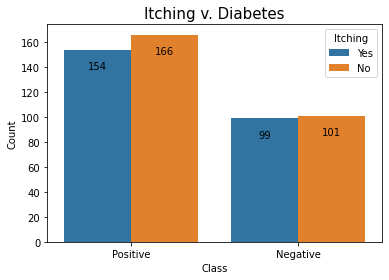

In [16]:
ax = sns.countplot(x='Class', hue='Itching', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Itching v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_itching')
plt.show()

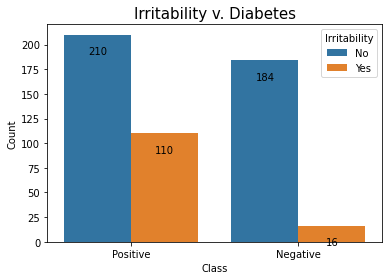

In [17]:
ax = sns.countplot(x='Class', hue='Irritability', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Irritability v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_irritability')
plt.show()

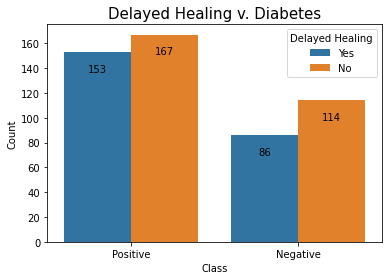

In [18]:
ax = sns.countplot(x='Class', hue='Delayed Healing', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Delayed Healing v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_delayed_healing')
plt.show()

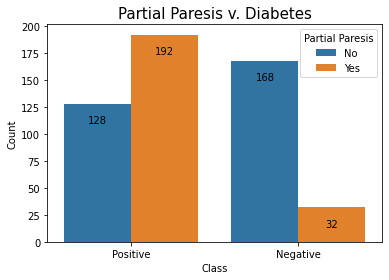

In [19]:
ax = sns.countplot(x='Class', hue='Partial Paresis', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Partial Paresis v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_partial_paresis')
plt.show()

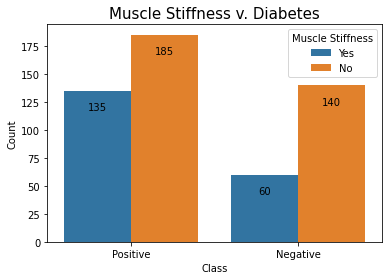

In [20]:
ax = sns.countplot(x='Class', hue='Muscle Stiffness', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Muscle Stiffness v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_muscle_stiffness')
plt.show()

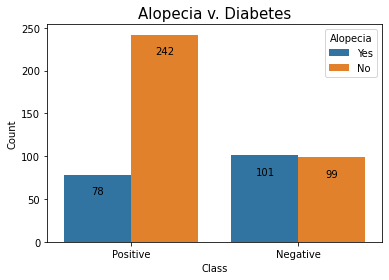

In [21]:
ax = sns.countplot(x='Class', hue='Alopecia', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Alopecia v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_alopecia')
plt.show()

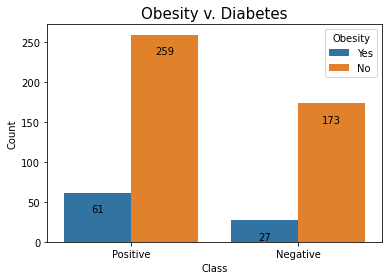

In [22]:
ax = sns.countplot(x='Class', hue='Obesity', data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top')
plt.title('Obesity v. Diabetes', fontsize=15)
plt.ylabel('Count')
plt.savefig('figures/count_obesity')
plt.show()

In [23]:
# Split data into training and test set
X = df1.drop('Class',axis=1)
Y = df1['Class']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=29)

In [24]:
# Model: Logistic Regression

lr = make_pipeline(StandardScaler(), LogisticRegression())
lr.fit(X_train, y_train)

print('Logistic Regression')
print('Accuracy on training set: {:.3f}'.format(lr.score(X_train, y_train)))
print('Accuracy on test set:     {:.3f}'.format(lr.score(X_test, y_test)))

Logistic Regression
Accuracy on training set: 0.940
Accuracy on test set:     0.929


In [25]:
# Create function to plot feature importances

features = [x for i,x in enumerate(df.columns) if i<16]

def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

Decision Tree
Accuracy on training set: 0.995
Accuracy on test set:     0.936


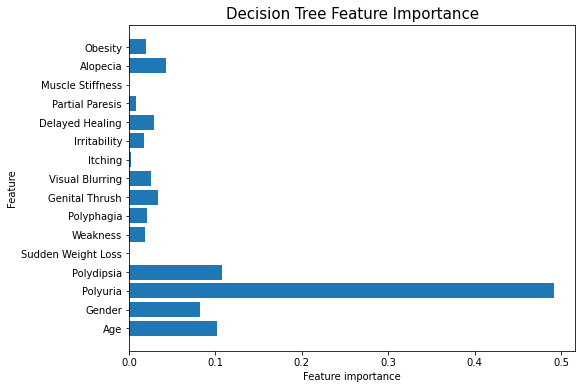

In [26]:
# Model: Decision Tree

dt = DecisionTreeClassifier(max_depth=7, random_state=29)
dt.fit(X_train, y_train)

print('Decision Tree')
print('Accuracy on training set: {:.3f}'.format(dt.score(X_train, y_train)))
print('Accuracy on test set:     {:.3f}'.format(dt.score(X_test, y_test)))

plot_feature_importances(dt)
plt.title('Decision Tree Feature Importance', fontsize=15)
plt.savefig('figures/feature_importance_dt')

Gradient Boosting
Accuracy on training set: 0.997
Accuracy on test set:     0.949


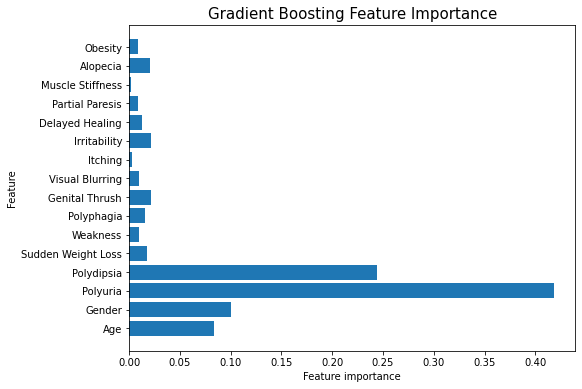

In [27]:
# Model: Gradient Boosting

gb = GradientBoostingClassifier(random_state=29)
gb.fit(X_train, y_train)

print('Gradient Boosting')
print('Accuracy on training set: {:.3f}'.format(gb.score(X_train, y_train)))
print('Accuracy on test set:     {:.3f}'.format(gb.score(X_test, y_test)))

plot_feature_importances(gb)
plt.title('Gradient Boosting Feature Importance', fontsize=15)
plt.savefig('figures/feature_importance_gb')

Random Forest
Accuracy on training set: 1.000
Accuracy on test set:     0.981


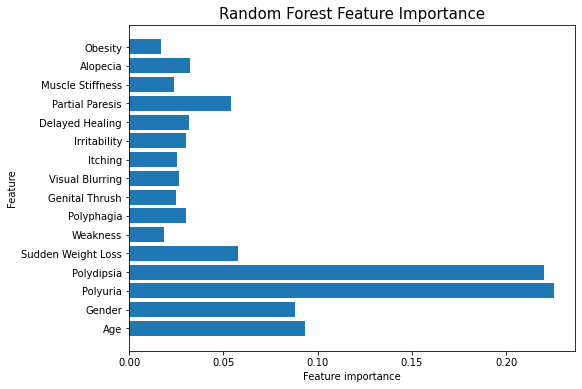

In [28]:
# Model: Random Forest

rf = RandomForestClassifier(n_estimators=100, random_state=29)
rf.fit(X_train, y_train)

print('Random Forest')
print('Accuracy on training set: {:.3f}'.format(rf.score(X_train, y_train)))
print('Accuracy on test set:     {:.3f}'.format(rf.score(X_test, y_test)))

plot_feature_importances(rf)
plt.title('Random Forest Feature Importance', fontsize=15)
plt.savefig('figures/feature_importance_rf')